# Información

La información es el concepto fundamental de la teoría de la información. Sus aplicaciones son múltiples, además de que funge como base para  el desarrollo de otras herramientas dentro de esta  teoría.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### El problema de las casillas

Supóngase que se tiene una tabla con 8 casillas donde sólo una puede tomar el valor 1, y las demas el valor 0. La probabilidad de que cualquier casilla tome el valor 1 es igual para todas las casillas.

$$
\begin{pmatrix} y_1 & y_2 & y_3 \\ y_4 & y_5 & y_6\end{pmatrix}
$$

Esto es tal que la prabilidad de $p(Y=y_i)$ para cualquier $i$ es uniforme (donde $Y$ representa la tabale completa), sabemos que  la información necesaria, el número de bits que requerimos para codificar cada disposición de la tabale, es:

$$I(y_i) = -\log p(Y=y_i)$$

Y ya que $p(Y=y_i) = \frac{1}{8}$, tenemos que la información necesarias es igual a 3.

Esto es, necesitamos 3 bits para codificar cualquier configuración que pueda tener la tabla.

Nuestras variables serán binarias, por lo que necesitamos definir los valores que  pueden tomar. Estos valores seran 0 y 1, o bien 'si' y  'no'. Para reconstruir la tabla de manera adecuada lo codificaremos por medio de vectores, que representan bits.

In [2]:
#bit 0 ó No
no = np.array([0,1])
#Bit 1 ó sí
si = np.array([1,0])

Ahora, para  codificar cualquier disposición necesitamos 3 bits, o lo que es lo mismo, 3 variables binarias. Estas variables representan preguntas binarias, podemos pensar, entonces que las variables representan las siguientes preguntas:

* $X_1$: ¿El uno está en la parte superior de la tabla?
* $X_2$: ¿El  uno está en la izuierda de la tabla restante?
* $X_3$: ¿El uno está en la casilla de la izquierda?

Con esto, responderemos 'sí' o 'no'  hasta representar la  codificación adecuada. Por ejemplo:

In [3]:
#Codificación
cod = [si,si,si]

Finalmente, a partir de esta codificación, podemos reconstruir la tabla completa con el uno en la casilla adecuada:

In [4]:
#reconstrucción de la tabla
tabla = np.outer(np.outer(cod[0],cod[1]),cod[2]).reshape(2,4)
print(tabla)

[[1 0 0 0]
 [0 0 0 0]]


### Selección de variables informativas

De manera similar, cuando tenemos una serie de objetos caracterizados por un conjunto de variables, podemos determinar cuánta información es aportada por cada una de estas variables. De esta forma, podemos darnos una idea de cuáles son las variables que mejor representan  los datos (sin embargo, debe notarse que la  información no depende de los objetos o clases, sino únicamente de las variables; para ser más precisos en la selección de las variables, deben utilizarse distribuciones conjuntas o condicionales).

Por ejemplo, considérese los siguientes datos:

In [5]:
#Objetos o clases
targets = ['gato','perro','tigre','lobo']
#Variables
variables = ['Doméstico','Animal','Felino','Cánido','Carnívoro','Grande']

#valores de las variables
datos = np.array([[1,1,1,0,1,0],[1,1,0,1,1,1],[0,1,1,0,1,1],[0,1,0,1,1,1]])

#Creación de tabla para visualización
X = pd.DataFrame(data=datos, index=targets, columns=variables)

X

,Doméstico,Animal,Felino,Cánido,Carnívoro,Grande
gato,1,1,1,0,1,0
perro,1,1,0,1,1,1
tigre,0,1,1,0,1,1
lobo,0,1,0,1,1,1


Recordemos que la información nos dice cuántos bits son los mínimos para codificar los datos. Sin embargo, no siempre se puede alcanzar este mínimo, pues dependemos del tipo de variables con que ya contamos, si estás no separán los datos, resultará  complidado obtener nueva información relevante.

In [6]:
#Información
print('Bits necesarios para codificación:', np.log2(len(targets)))

Bits necesarios para codificación: 2.0


Ahora podemos obtener la información para cada variable como:

$$I(X_i) = -\log p_i$$

En este caso, dado que las variables sólo tienen dos  valores, cada una de estás tendrá  una distribución Bernoulli con parámetro $p_i$. Este parámetro representa la probabilidad y puede estimarse como $p_i = \mathbb{E}[X] \approx \frac{1}{N}\sum_x x_i$, tal que $x_i$ es un valor tomado por la variable $X_i$. 

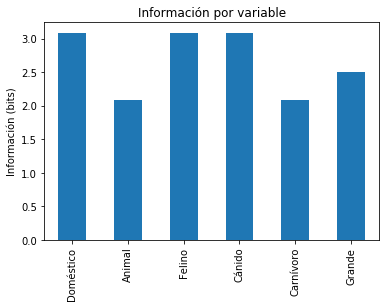

In [7]:
#Estimación de probabilidades
p = X.sum(0)/X.sum(0).sum(0)
#Información
I = -np.log2(p)

#Visualización de la información
I.plot.bar()
plt.title('Información por variable')
plt.ylabel('Información (bits)')
plt.show()

De tal forma, que podemos quedarnos únicamente con las variables más informativas. Más aún, ya que la información para codificar todo el sistema, podemos tomar únicamente dos de estas variables.

In [8]:
Xcod = X.drop(['Animal','Cánido','Carnívoro','Grande'],  axis=1)

Xcod

,Doméstico,Felino
gato,1,1
perro,1,0
tigre,0,1
lobo,0,0


Y podemos ver que esto nos permite discriminar los datos  en sus respectivas clases:

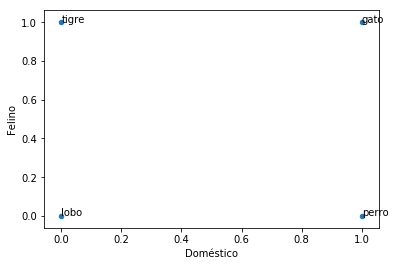

In [9]:
#Ploteo de datos
fig, ax = plt.subplots()
ax_labs = Xcod.columns
Xcod.plot(ax_labs[0],ax_labs[1], kind='scatter', ax=ax)

#Labels
for k, v in Xcod.iterrows():
    ax.annotate(k, v)

fig.canvas.draw
plt.show()